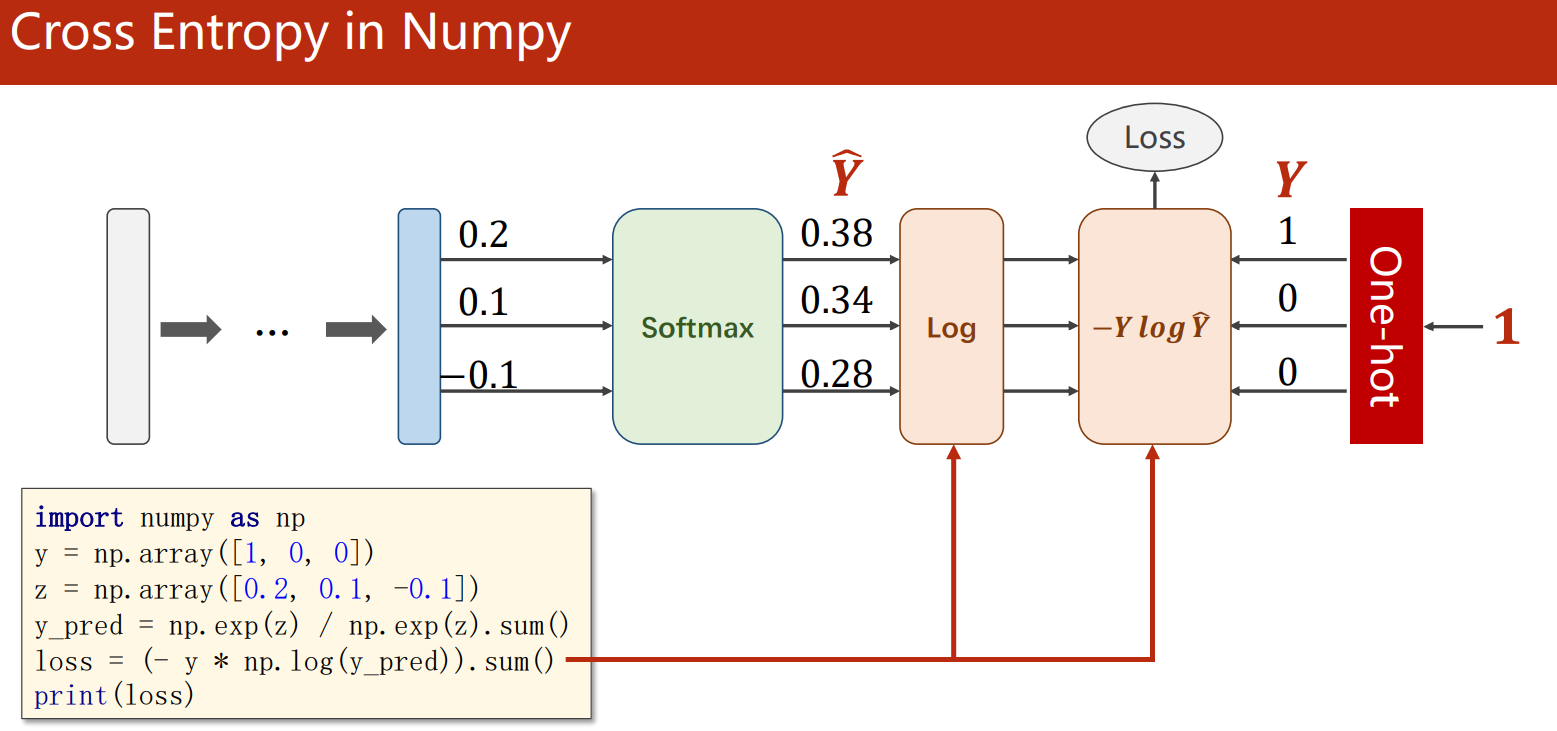

In [1]:
import numpy as np

In [2]:
y = np.array([1,0,0])
z = np.array([0.2,0.1,-0.1])

In [3]:
y

array([1, 0, 0])

In [4]:
z

array([ 0.2,  0.1, -0.1])

In [5]:
y_pred = np.exp(z) / np.exp(z).sum()

In [6]:
y_pred

array([0.37797814, 0.34200877, 0.28001309])

In [7]:
loss = (-y * np.log(y_pred)).sum()

In [8]:
loss

0.9729189131256584

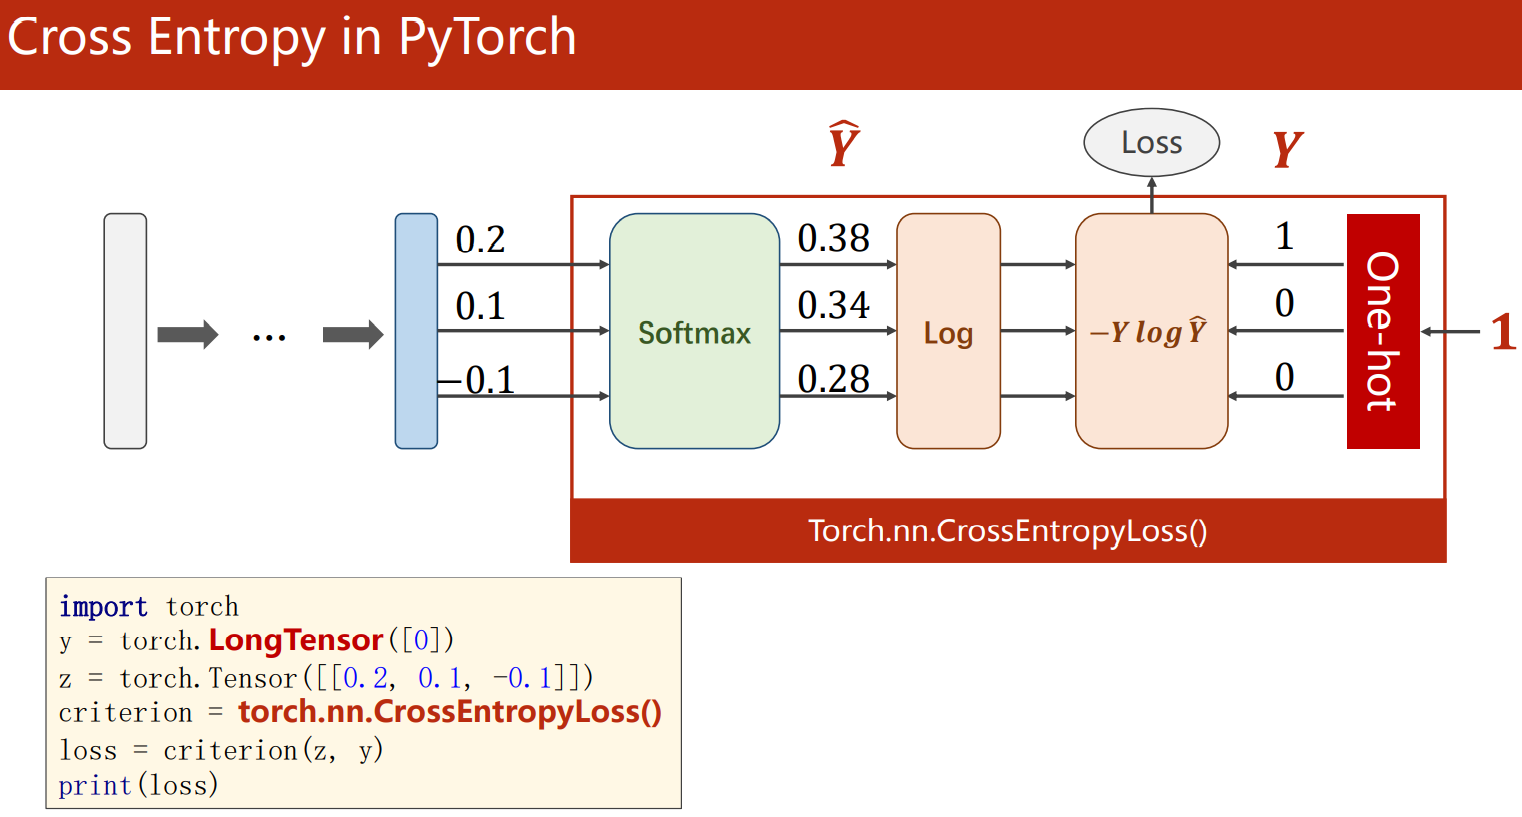

In [9]:
import torch

In [10]:
y = torch.LongTensor([0])

In [11]:
y

tensor([0])

In [12]:
z = torch.Tensor([[0.2,0.1,-0.1]])

In [13]:
z

tensor([[ 0.2000,  0.1000, -0.1000]])

In [14]:
criterion = torch.nn.CrossEntropyLoss()

In [15]:
loss = criterion(z,y)

In [16]:
loss

tensor(0.9729)

In [17]:
Y = torch.LongTensor([2,0,1])

In [18]:
Y

tensor([2, 0, 1])

In [19]:
Y_pred1 = torch.Tensor([[0.1, 0.2, 0.9],[1.1, 0.1, 0.2],[0.2, 2.1, 0.1]])

In [20]:
Y_pred1

tensor([[0.1000, 0.2000, 0.9000],
        [1.1000, 0.1000, 0.2000],
        [0.2000, 2.1000, 0.1000]])

In [21]:
Y_pred2 = torch.Tensor([[0.8,0.2,0.3],
                        [0.2,0.23,0.5],
                        [0.2,0.2,0.5]])

In [22]:
Y_pred2

tensor([[0.8000, 0.2000, 0.3000],
        [0.2000, 0.2300, 0.5000],
        [0.2000, 0.2000, 0.5000]])

In [23]:
loss1 = criterion(Y_pred1,Y)

In [24]:
loss1

tensor(0.4966)

In [25]:
loss2 = criterion(Y_pred2,Y)

In [26]:
loss2

tensor(1.2316)

In [27]:
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

### prepare dataset

In [28]:
batch_size = 64

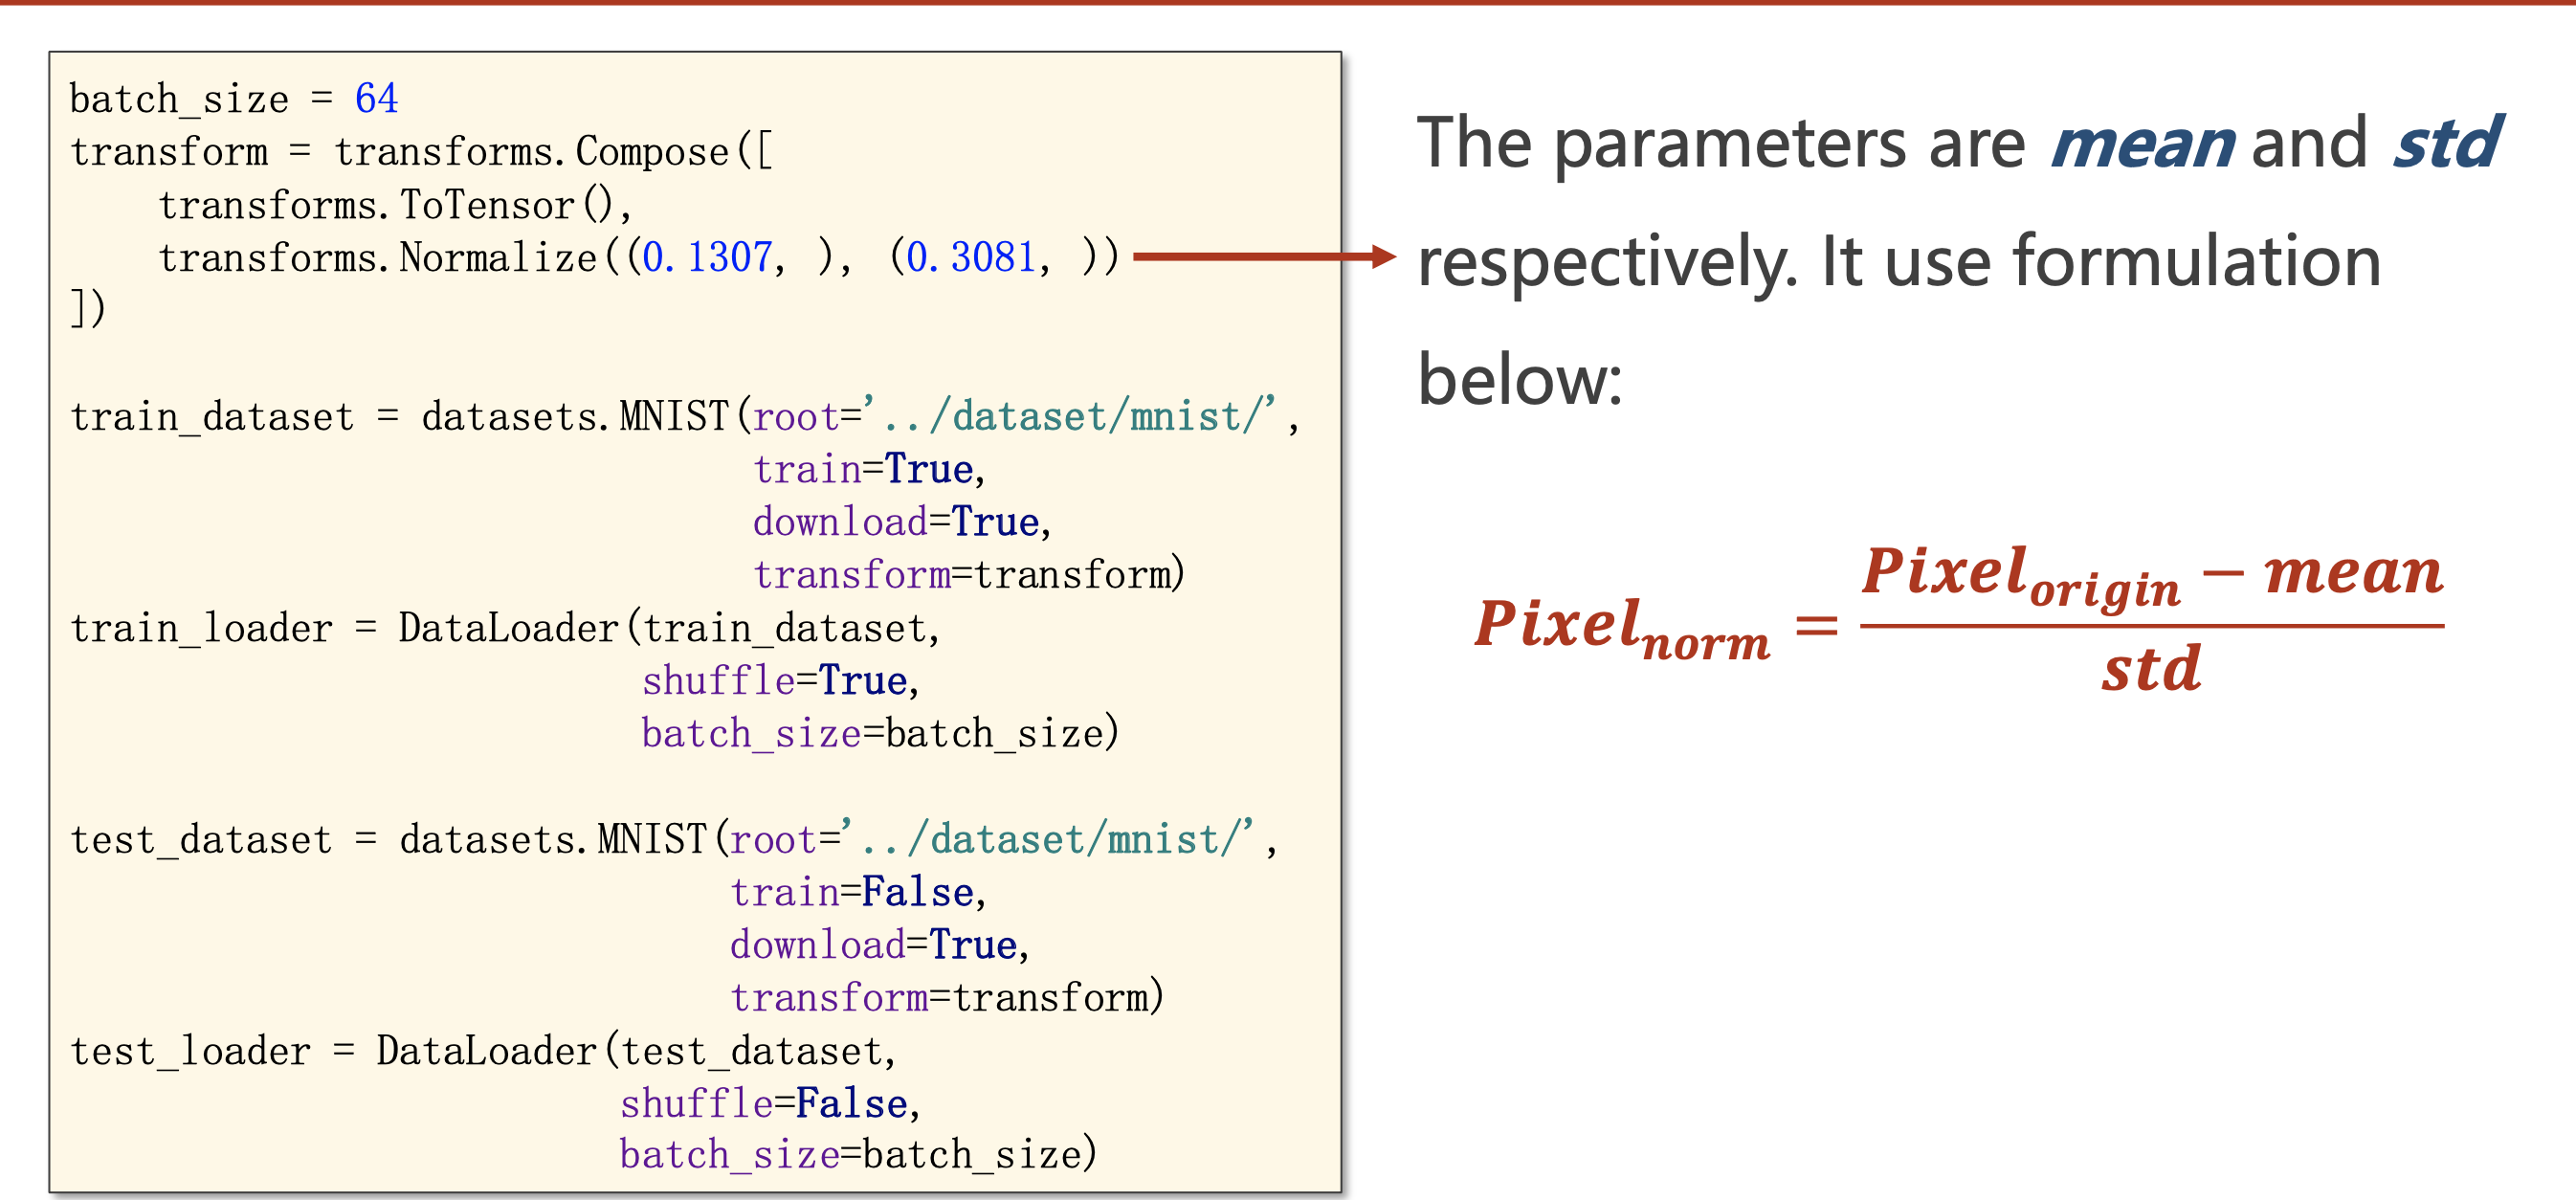

In [29]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,),(0.3081,))
                               ])

In [30]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.1307,), std=(0.3081,))
)

In [31]:
train_dataset = datasets.MNIST(root="../dataset/mnist/",
              train=True,
              download =True,
              transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../dataset/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../dataset/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../dataset/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../dataset/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../dataset/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../dataset/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../dataset/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../dataset/mnist/MNIST/raw



/Users/gaozhiyong/Documents/pyenv/py3.6_tf2.6/lib/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [33]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../dataset/mnist/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [34]:
train_loader = DataLoader(train_dataset,shuffle=True,batch_size=batch_size)

In [35]:
train_loader

In [36]:
test_dataset = datasets.MNIST(root="../dataset/mnist/",train=False,download=True,transform=transform)

In [37]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../dataset/mnist/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

In [38]:
test_loader = DataLoader(test_dataset,shuffle=False,batch_size=batch_size)

In [39]:
test_loader

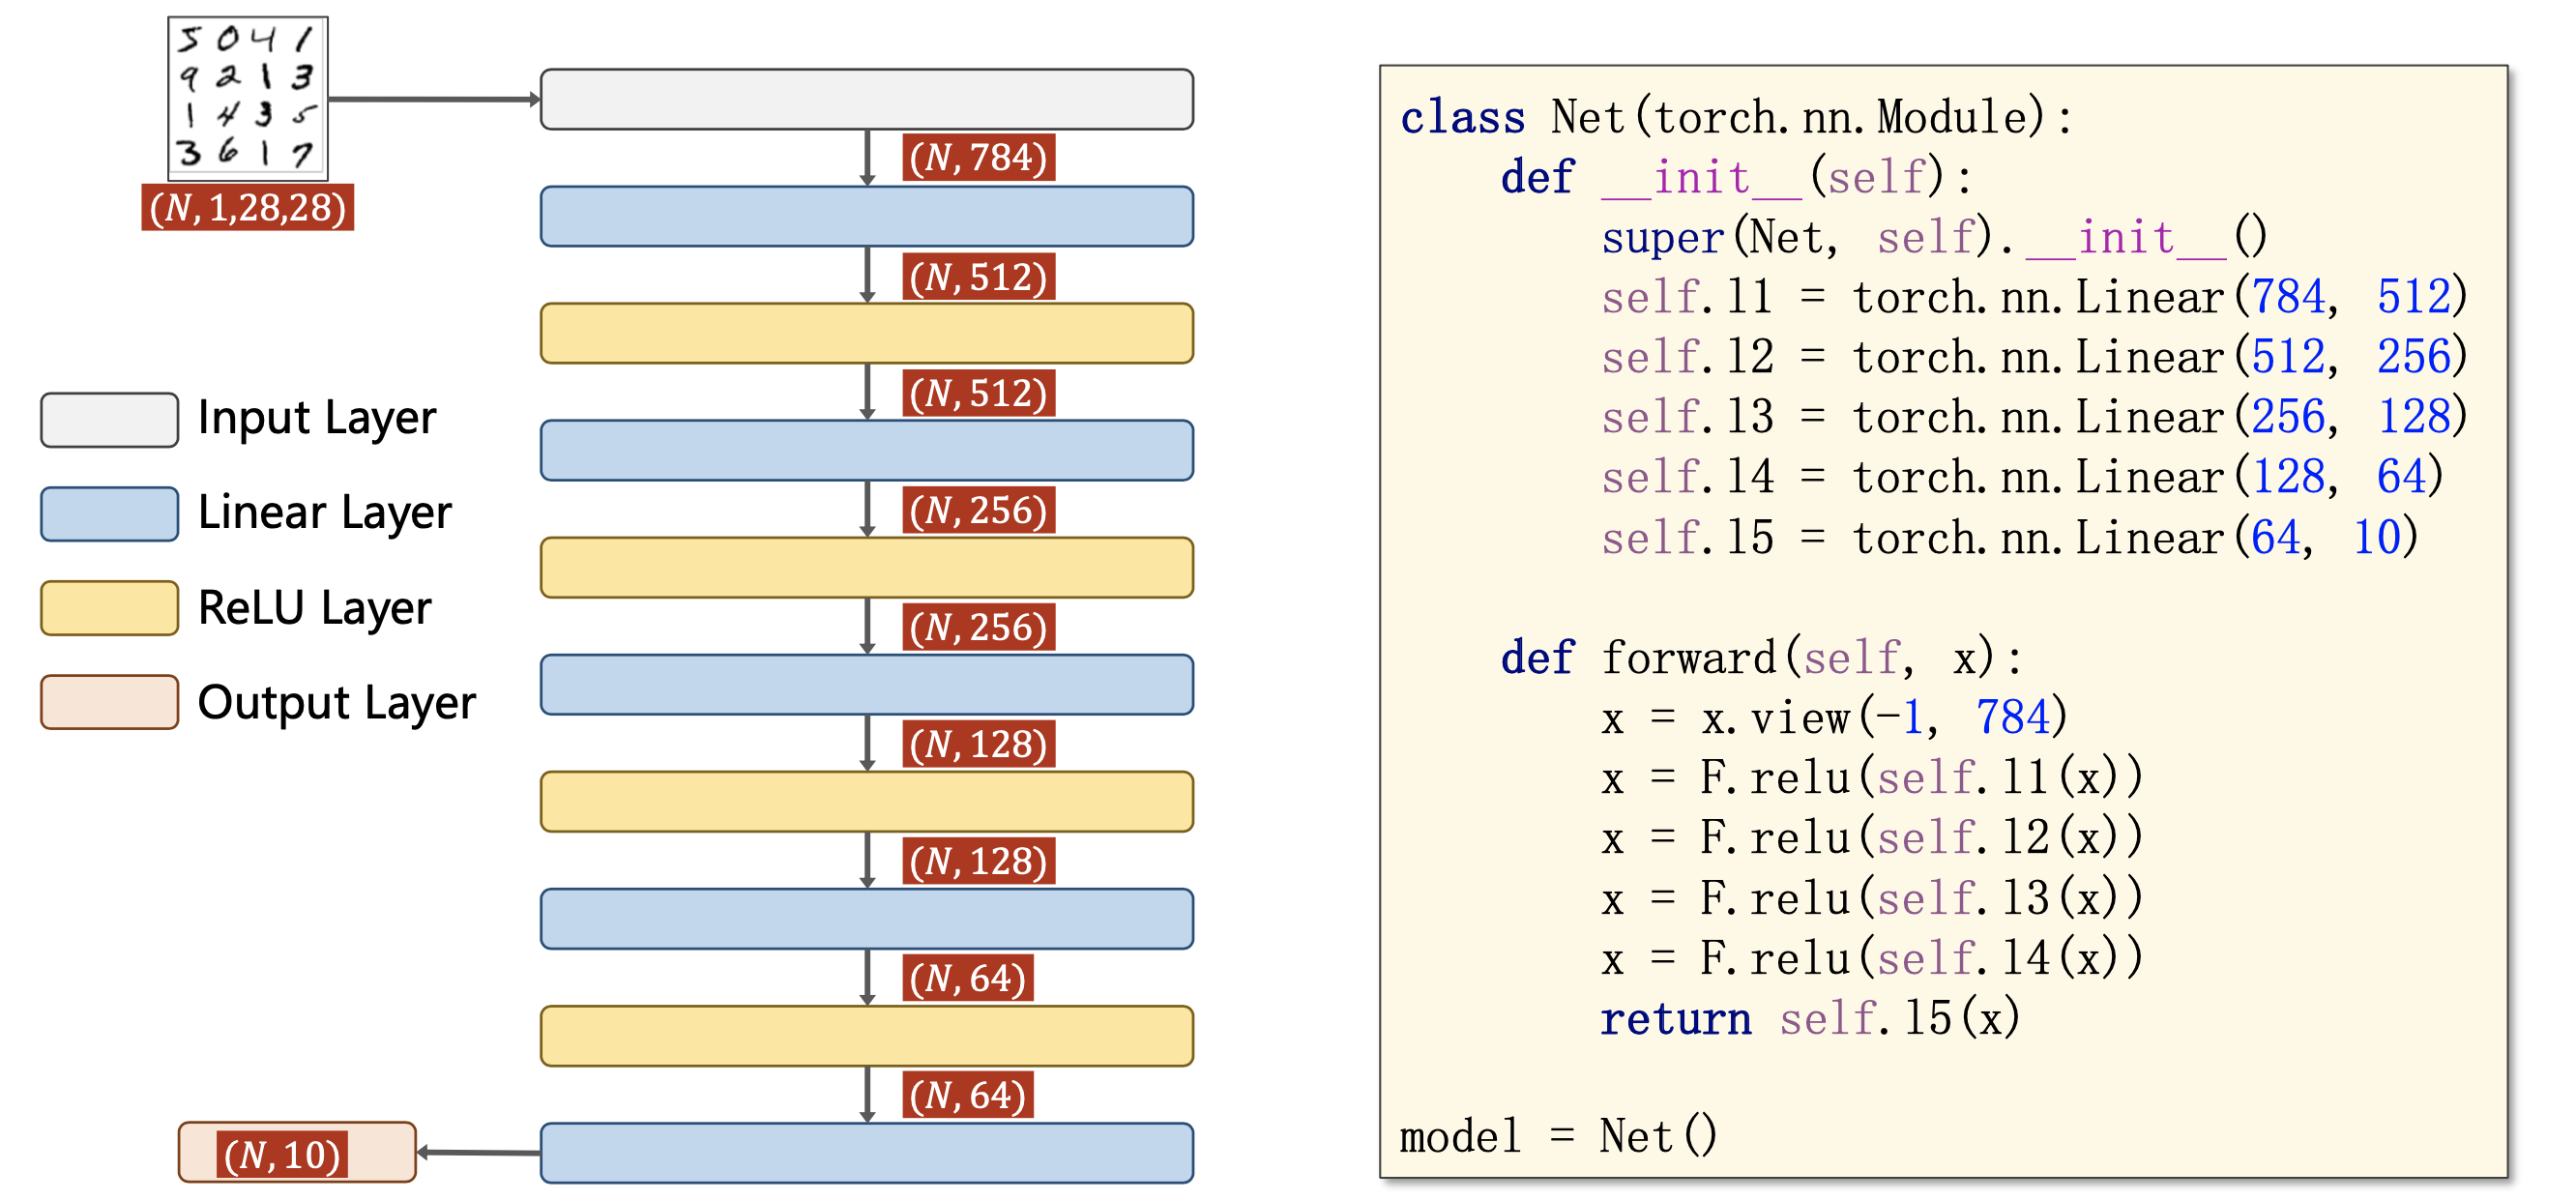

### design model

In [40]:
class ModelNet(torch.nn.Module):
    def __init__(self):
        super(ModelNet,self).__init__()
        
        self.l1 = torch.nn.Linear(784,512)
        self.l2 = torch.nn.Linear(512,256)
        self.l3 = torch.nn.Linear(256,128)
        self.l4 = torch.nn.Linear(128,64)
        self.l5 = torch.nn.Linear(64,10)
        
    def forward(self,x):
        x = x.view(-1,784)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))        
        x = F.relu(self.l3(x))        
        x = F.relu(self.l4(x))  
        return self.l5(x)

In [41]:
model = ModelNet()

In [42]:
model

ModelNet(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=128, bias=True)
  (l4): Linear(in_features=128, out_features=64, bias=True)
  (l5): Linear(in_features=64, out_features=10, bias=True)
)

In [43]:
model.parameters

<bound method Module.parameters of ModelNet(
  (l1): Linear(in_features=784, out_features=512, bias=True)
  (l2): Linear(in_features=512, out_features=256, bias=True)
  (l3): Linear(in_features=256, out_features=128, bias=True)
  (l4): Linear(in_features=128, out_features=64, bias=True)
  (l5): Linear(in_features=64, out_features=10, bias=True)
)>

### contruct loss and optimizer

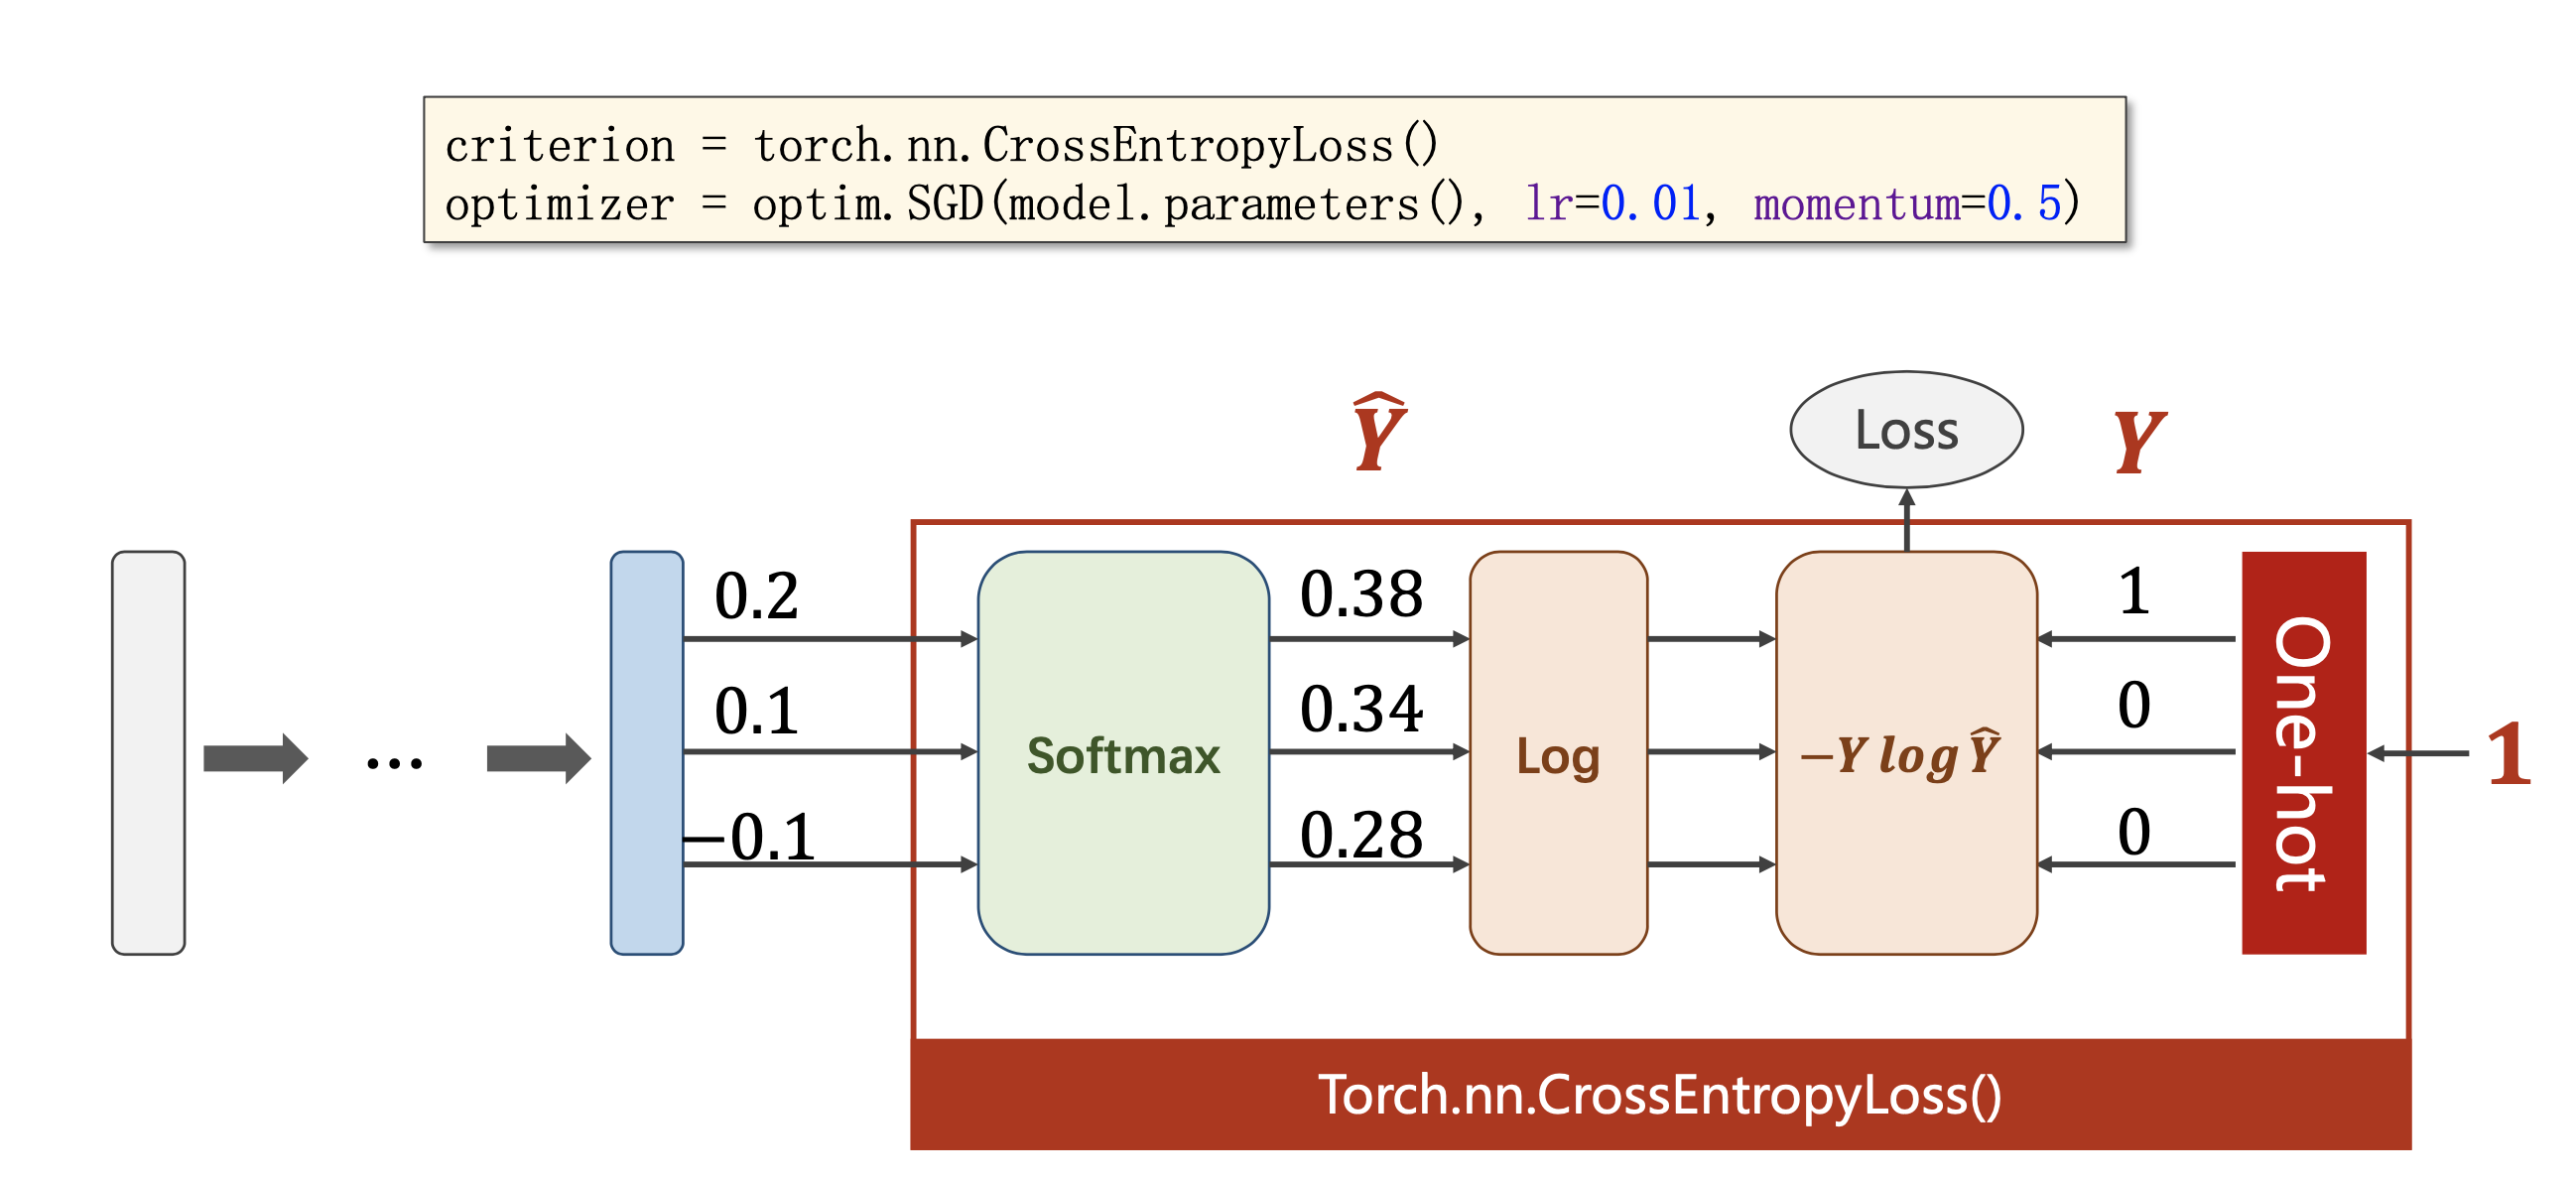

In [44]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.1,momentum=0.5)

In [45]:
criterion

CrossEntropyLoss()

In [46]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)

### train and test

In [47]:
def train(epoch):
    run_loss = 0.0
    for batch_idx,data in enumerate(train_loader):
        inputs,target = data
        optimizer.zero_grad()  #梯度提前归0
        
        # forward + backward + update
        outputs = model(inputs)
        loss = criterion(outputs,target)
        loss.backward()
        optimizer.step()
        
        
        run_loss += loss.item()
        if batch_idx %300 ==299:
            print("[%d, %5d] loss: %.3f" % (epoch+1,batch_idx+1,run_loss/300))
            run_loss =0.0

In [48]:
def test():
    correct =0 
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            outputs = model(images)
            print(torch.max(outputs.data,dim=1))
            _,predicted = torch.max(outputs.data,dim=1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print("accuracy on test set : %d %%"%(100 * correct / total))

In [49]:
for epoch in range(10):
    train(epoch)
    test()

[1,   300] loss: 0.658
[1,   600] loss: 0.190
[1,   900] loss: 0.146
torch.return_types.max(
values=tensor([12.7959,  8.8977, 10.0474,  7.9050, 11.9581, 12.3984, 10.1692,  5.6024,
         5.6643,  9.5668,  9.4571,  7.3649, 10.7956,  9.5490, 13.8833,  8.7208,
        11.2850, 12.0342,  6.3790, 12.5554,  7.8546,  9.6329,  8.7275, 13.6156,
         9.9281,  9.0737, 10.2935, 14.5813, 10.9379, 10.9246, 11.2601, 10.0591,
        12.1720,  7.9964, 13.6643,  9.3402, 11.2430, 11.9139,  6.4020, 11.0573,
         9.2160, 10.1420, 12.8306,  6.3240,  7.1416,  9.8654, 10.2046,  8.9255,
        15.3446, 14.7169,  8.0854,  8.8249, 11.4253,  8.2600,  9.5989,  9.5624,
        15.7829, 11.0241, 10.2889,  9.3673, 11.3263,  6.0921,  5.3436,  5.2704]),
indices=tensor([7, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3]))
torch.return_types.max(
values=t